# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [1]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

## 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [3]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

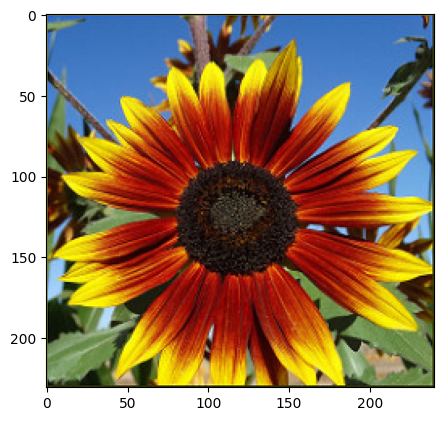

In [5]:
plt.figure(figsize=[5, 5])
plt.imshow(img_rgb)

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

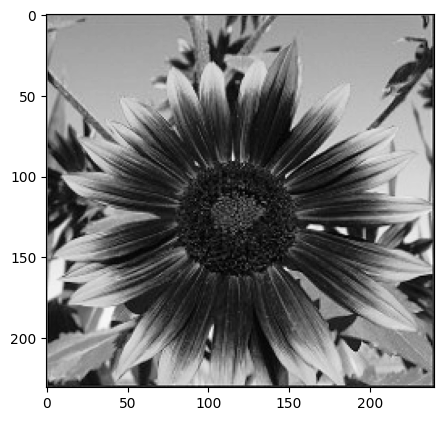

In [7]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [8]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

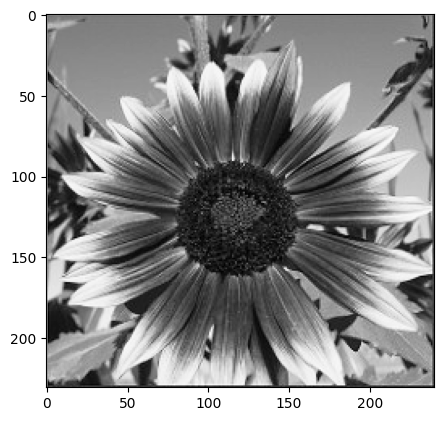

In [9]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

серое изображение - двумерный массив:

In [10]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB $\to$ gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [104]:
def convert_rgb_to_grayscale(img_rgb):
    new_img = img_rgb[:,:,0] * 0.29901 + img_rgb[:,:,1] * 0.58701 + img_rgb[:,:,2] * 0.1140
    return np.rint(new_img)

In [105]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Почему бы не использовать при преобразовании в серое просто среднее арифметическое?

**Ответ:** человеческий глаз имеет разное количество рецепторов для восприятия красного синего и зелёного цветов. Мы лучше различаем зелёный и поэтому ему даём больший вес при усреднении.

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB $\to$ HSV

In [13]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

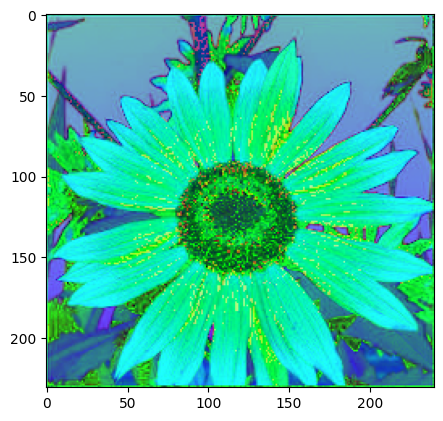

In [14]:
plt.figure(figsize=[5, 5])
plt.imshow(img_hsv)

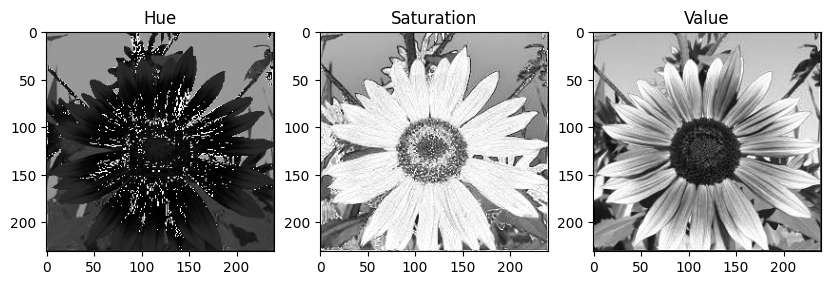

In [15]:
# Split the image into color channels
h, s, v = cv2.split(img_hsv)

plt.figure(figsize=[10, 30])
plt.subplot(131)
plt.imshow(h, cmap="gray")
plt.title('Hue')

plt.subplot(132)
plt.imshow(s, cmap="gray")
plt.title('Saturation')

plt.subplot(133)
plt.imshow(v, cmap="gray")
plt.title('Value')

# Display the plot
plt.show()


## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

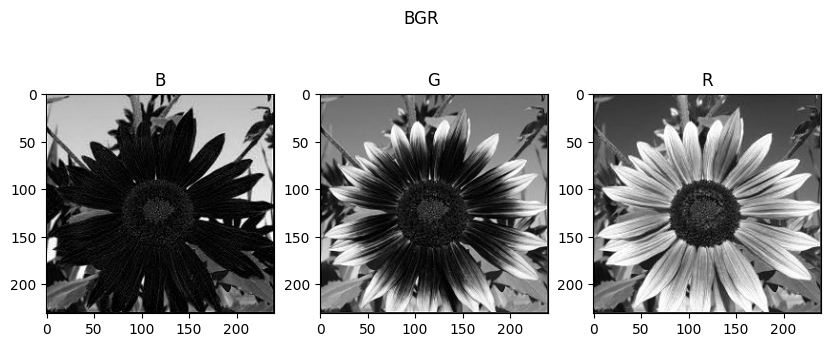

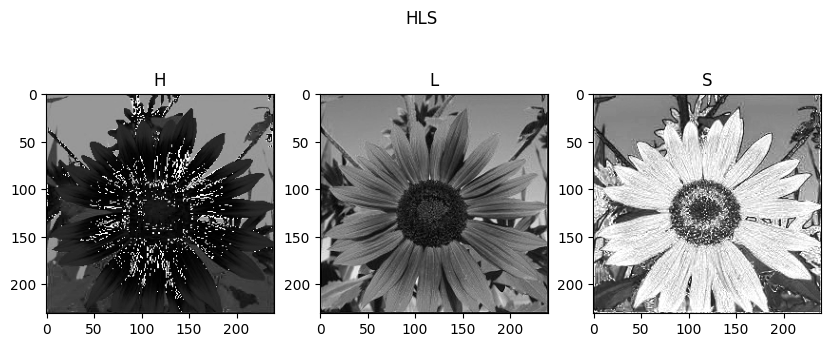

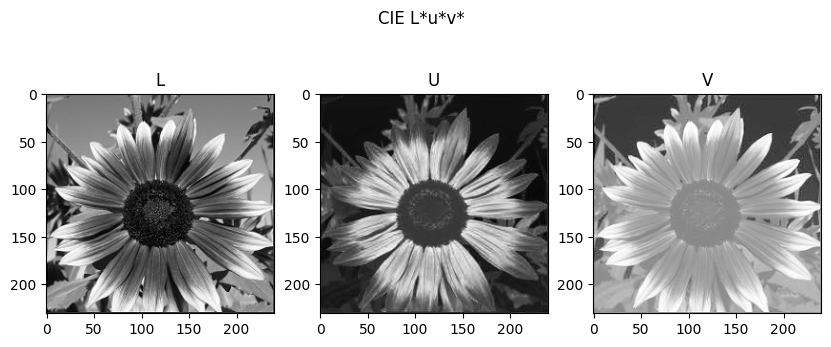

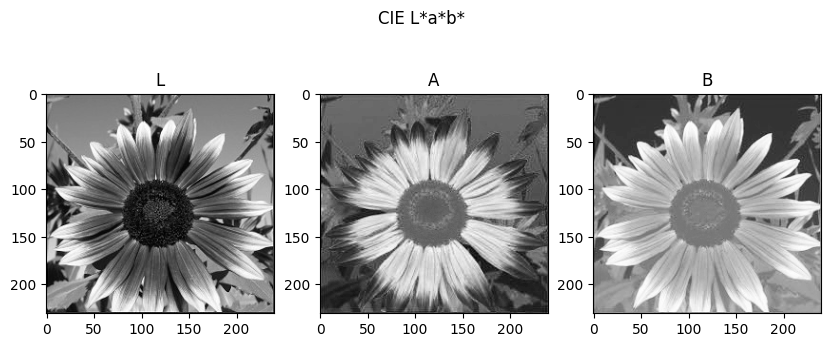

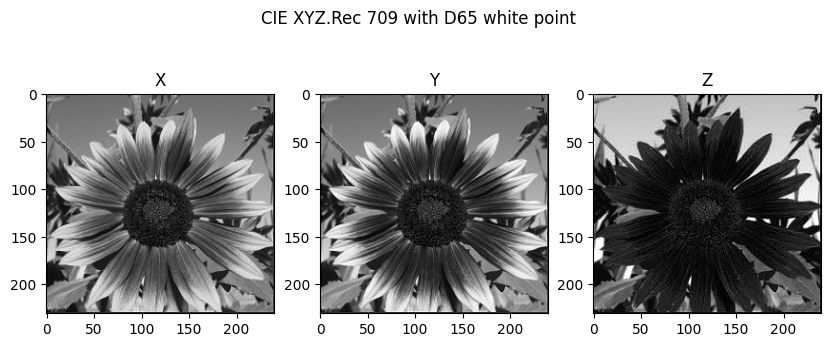

In [16]:
def display_channels(channels, labels, title):
    fig, axes = plt.subplots(1, len(channels), figsize=[10, 4])
    fig.suptitle(title)
    for c, l, ax in zip(channels, labels, axes):
        ax.imshow(c, cmap="gray")
        # ax.
        ax.title.set_text(l)

    # Display the plot
    # plt.tight_layout()
    plt.show()


for coverter_type, labels, title in [
        (cv2.COLOR_RGB2BGR, "BGR", "BGR"),
        (cv2.COLOR_RGB2HLS, "HLS", "HLS"),
        (cv2.COLOR_RGB2LUV, "LUV", "CIE L*u*v*"),
        (cv2.COLOR_RGB2LAB, "LAB", "CIE L*a*b*"),
        (cv2.COLOR_RGB2XYZ, "XYZ", "CIE XYZ.Rec 709 with D65 white point "),
    ]:
    new_img = cv2.cvtColor(img_rgb, coverter_type)
    channels = cv2.split(new_img)
    display_channels(channels, labels, title)
    # raise Exception

## Вопрос 2

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:** в задачах где может быть полезно использовать определённые цвета или некоторые характеристики цвета явно применяемые в некоторых разложениях изображения на каналы

## Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визализировать гистограмму:

In [17]:
def visualize_hist(hist):
    plt.figure(figsize=[20, 5])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [18]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [19]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

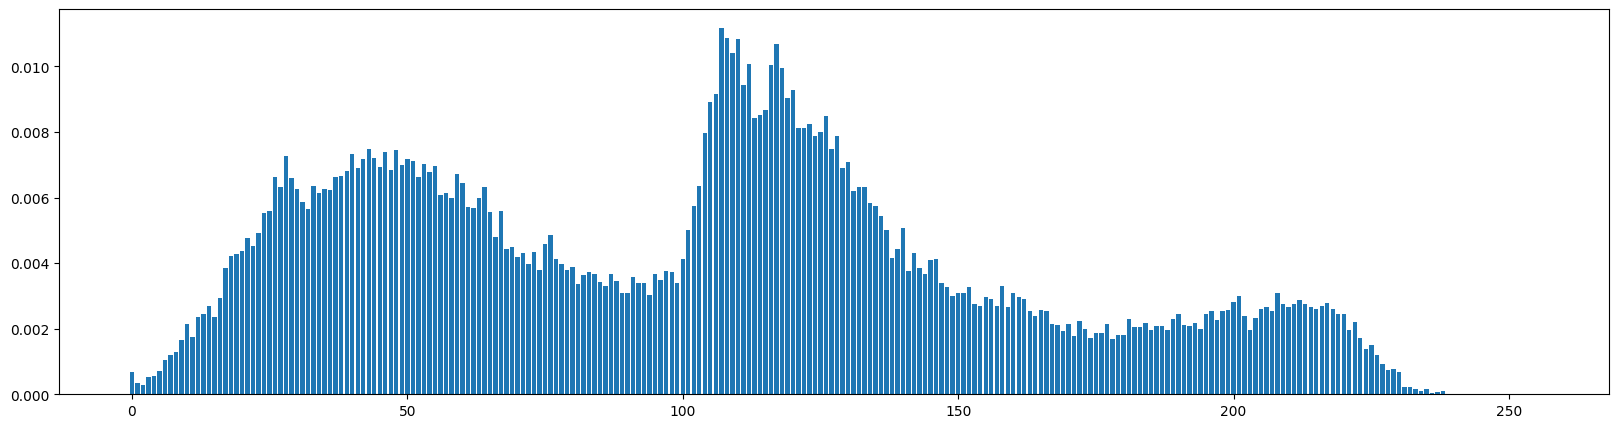

In [20]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [21]:
def compute_hist(channel):
    hist = np.zeros(256)
    values, counts = np.unique(channel, return_counts=True)
    hist[values] = counts
    return hist

In [22]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

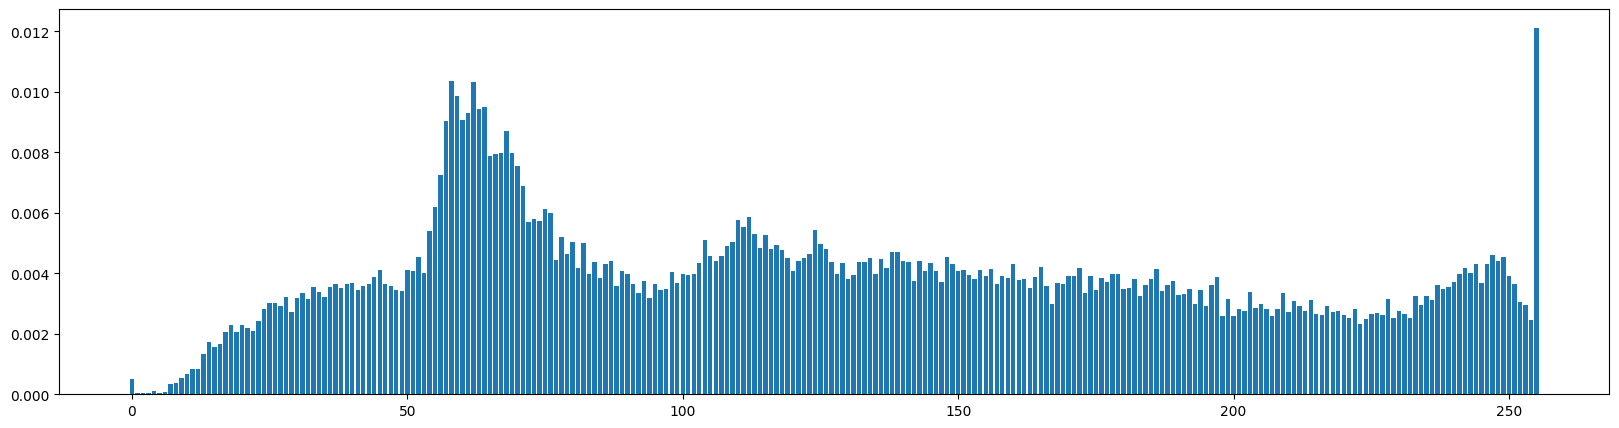

In [23]:
visualize_hist(hist_r)

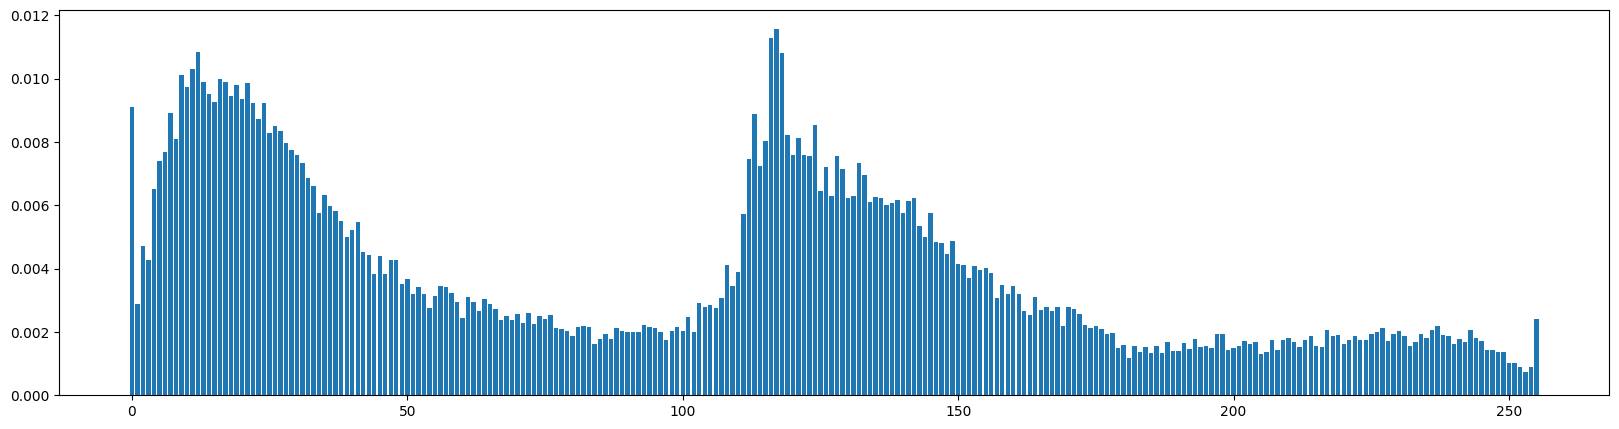

In [24]:
visualize_hist(hist_g)

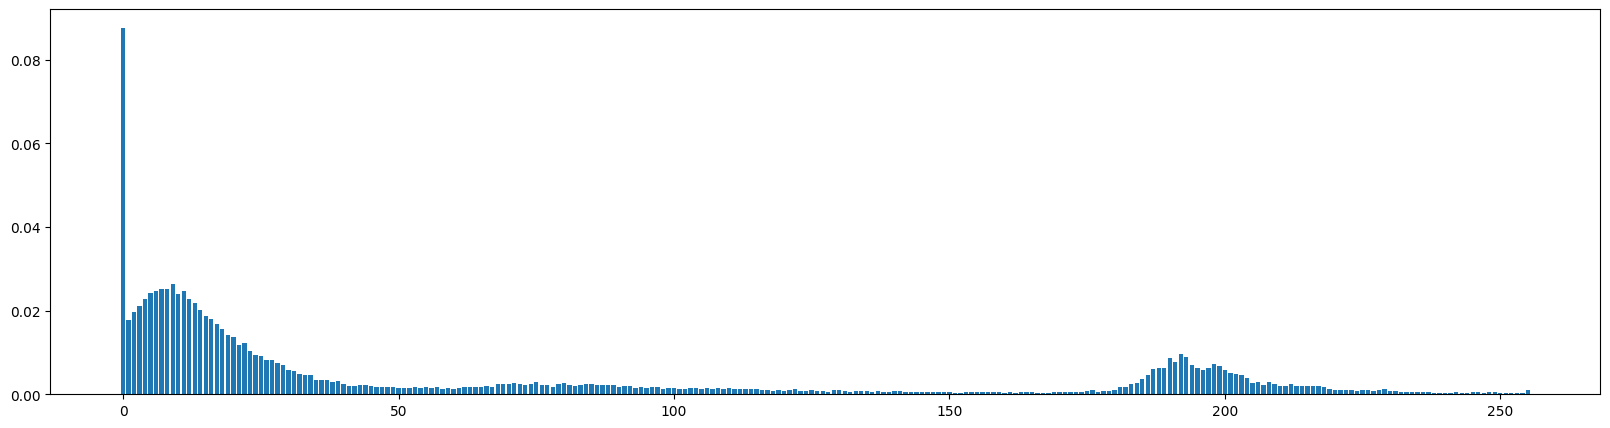

In [25]:
visualize_hist(hist_b)

In [26]:
assert((hist_gray == hist_cv).all())

## Вопрос 3

 Что можно сказать об изображении по его гистограмме?

**Ответ:** о пропорциях цветов и яркости изображения

## Вопрос 4

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени?

**Ответ:** при смене кадра и особенно при смене камеры/фильтра может меняться яркость, насыщенность и прочие параметры изображения

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

In [27]:
compressed_images = {}
for jpeg_quality in [90, 60, 30, 5]:
    save_path = f'./data/compressed_img_{jpeg_quality}.jpg'
    cv2.imwrite(save_path, img_gray, [cv2.IMWRITE_JPEG_QUALITY, jpeg_quality])
    compressed_images[jpeg_quality] = cv2.imread(save_path, cv2.IMREAD_GRAYSCALE)

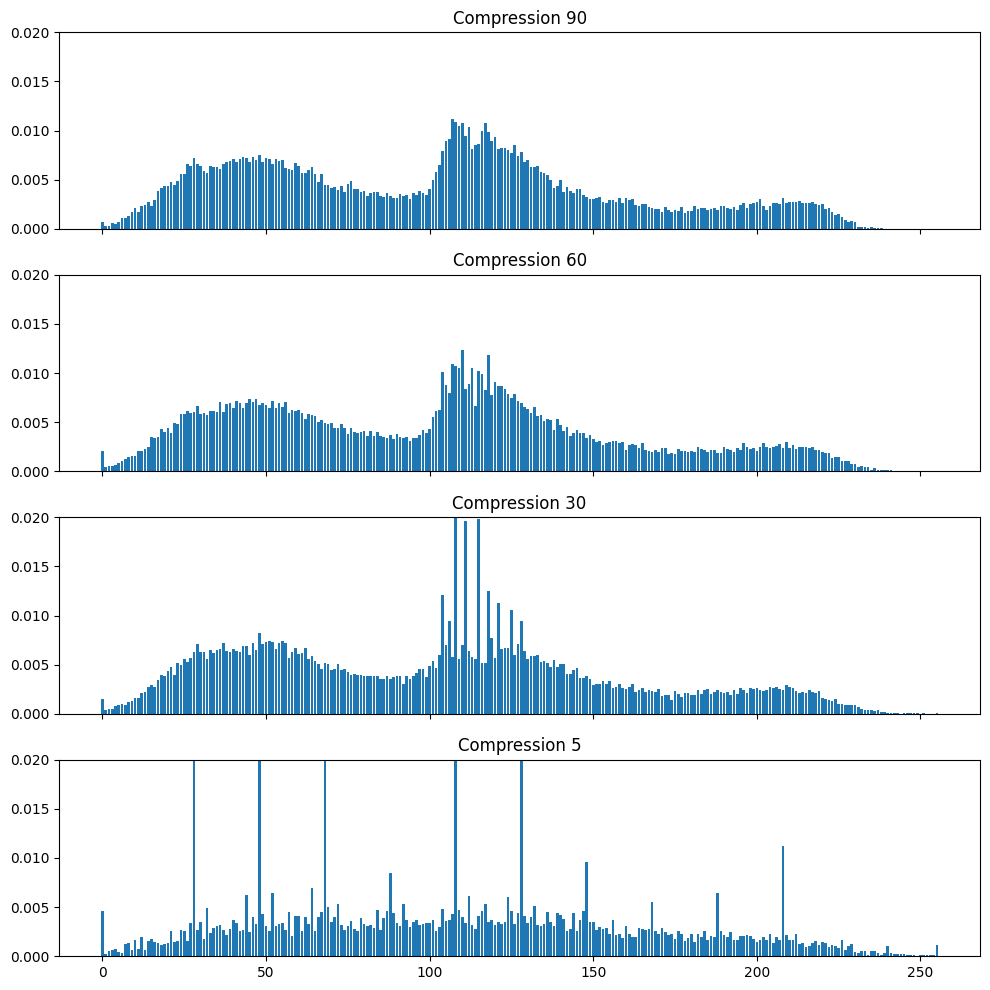

In [28]:
fig, axes = plt.subplots(len(compressed_images),1, figsize=(10, 10), sharex=True, sharey=True)
for ax, (jpeg_quality, img) in zip(axes, compressed_images.items()):
    hist = compute_hist(img)
    ax.bar(np.arange(len(hist)), hist / hist.sum(), label=jpeg_quality)
    ax.title.set_text(f"Compression {jpeg_quality}")
    ax.set_ylim([0, 0.02])
fig.tight_layout()

**Выводы:** Увеличение степени сжатия вплоть до постепенно увеличивает число выбросов на гистограмме, особенно хорошо это видно при сжатии 5. При сжатии вплоть до 30 общий вид диаграммы сохраняется, но при сжатии 5 распределение становится ближе к равномерному. Таким образом при сжатии изображения становятся более шумными, а при очень сильном сжатии начинают терять изначальное распределение по яркости цвета.

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

Подсказка: вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

(768, 1024, 3) (768, 1024, 3)


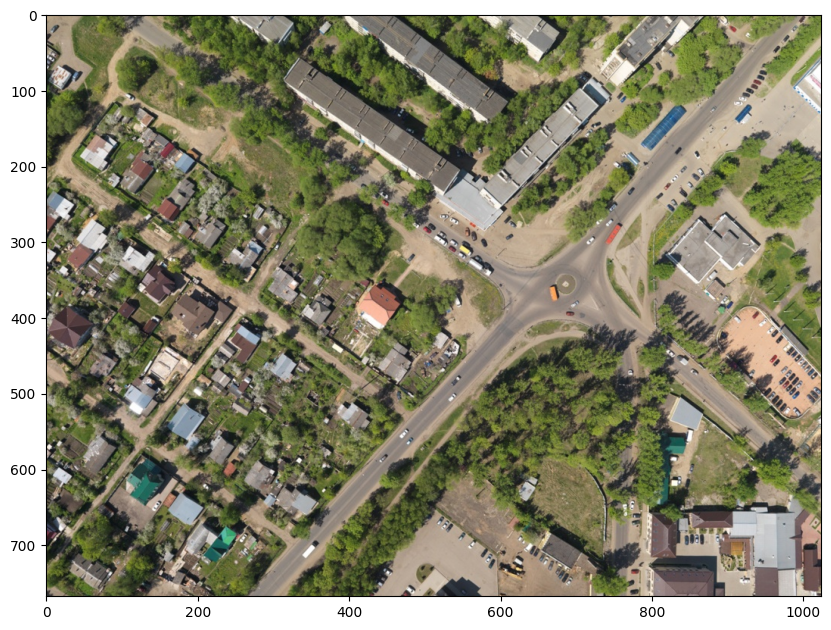

In [29]:
aerial_image_rgb = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)
aerial_image_hsv = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_RGB2HSV_FULL)

print(aerial_image_rgb.shape, aerial_image_hsv.shape)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image_rgb)

Доля зелёных насаждений: 16.4%


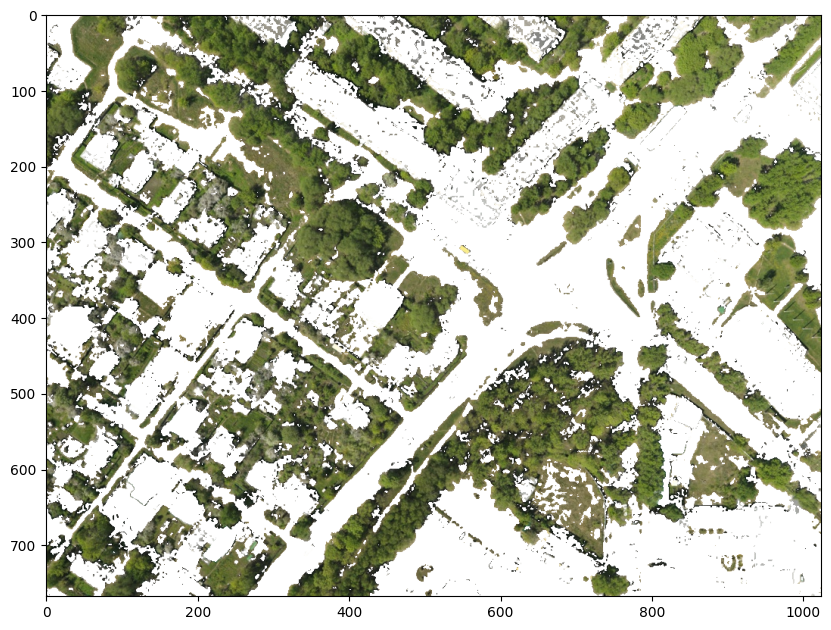

In [49]:
hue = aerial_image_hsv[:,:,0]
green_mask = (hue > 70) & (hue < 140)
green_mask = np.stack((green_mask, green_mask, green_mask), axis=-1)
green_in_image = np.where(green_mask, aerial_image_rgb, 255)
plt.imsave("./data/green_in_image.jpg", green_in_image)

plt.figure(figsize=[10, 10])
plt.imshow(green_in_image)

green_percent = green_mask[:,:,0].sum() / green_mask.size
print(f"Доля зелёных насаждений: {round(green_percent * 100, 1)}%")

# Упражнение 6: Интегральное изображение
Напомним, что интегральным изображением называется следующая функция:
$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$
С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [99]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img
        self.I = np.cumsum(np.cumsum(img, axis=0), axis=1)

    def sum(self, x, y, w, h):
        a = self.I[x+w-1, y+h-1] if (x+w > 0 and y+h > 0) else 0
        b = self.I[x-1,   y+h-1] if (x > 0   and y+h > 0) else 0
        c = self.I[x+w-1, y-1]   if (y > 0   and x+w > 0) else 0
        d = self.I[x-1,   y-1]   if (x > 0   and y > 0)   else 0
        
        return a-b-c+d

In [100]:
I = IntegralImage(img_gray)

In [101]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

/tmp/ipykernel_8413/3654630681.py:15: RuntimeWarning: overflow encountered in scalar subtract
  return a-b-c+d
/tmp/ipykernel_8413/3654630681.py:15: RuntimeWarning: overflow encountered in scalar add
  return a-b-c+d


## Вопрос 5

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:** обнаружение объектов, нахождение центра масс, быстрое вычисление локальных гистограм

## Вопрос 6

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:** динамическое программирование